# 1. Introduction

In this notebook, we explore and clean a dairy cattle dataset containing 250,000 dairy cows in order to predict a cow's milk yield.

This section documents:

- Initial loading of the dataset

- Identification of missing values and data quality issues

- Exploratory analysis to understand distributions and relationships

- Early feature-cleaning decisions based on exploratory data analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

df = pd.read_csv("cattle_data_train.csv")
df.head()

,Cattle_ID,Breed,Climate_Zone,Management_System,Age_Months,Weight_kg,Parity,Lactation_Stage,Days_in_Milk,Feed_Type,Feed_Quantity_kg,Feeding_Frequency,Water_Intake_L,Walking_Distance_km,Grazing_Duration_hrs,Rumination_Time_hrs,Resting_Hours,Ambient_Temperature_C,Humidity_percent,Housing_Score,FMD_Vaccine,Brucellosis_Vaccine,HS_Vaccine,BQ_Vaccine,Anthrax_Vaccine,IBR_Vaccine,BVD_Vaccine,Rabies_Vaccine,Previous_Week_Avg_Yield,Body_Condition_Score,Milking_Interval_hrs,Date,Farm_ID,Feed_Quantity_lb,Mastitis,Milk_Yield_L
0,CATTLE_133713,Holstein,Tropical,Intensive,114,544.8,4,Mid,62,Concentrates,16.363455,2,71.101024,4.77,7.8,-2.269369,12.3,28.706090,70.6,0.871430,0,1,1,0,0,1,0,1,6.31,3.0,12,2024-01-15,FARM_0301,36.8235,1,12.192634
1,CATTLE_027003,Holstein,Arid,Mixed,136,298.9,4,Mid,213,Crop_Residues,NaN,4,55.697328,5.99,7.4,8.973851,11.4,28.599741,57.5,0.825488,1,1,0,1,0,0,0,0,17.16,4.0,12,2023-10-31,FARM_0219,NaN,0,14.717031
2,CATTLE_122459,Holstein,Tropical,Semi_Intensive,64,336.6,4,Late,16,Hay,7.198607,2,65.576827,3.45,8.8,-4.590550,8.6,12.520386,51.2,0.904957,0,0,1,1,0,1,1,0,4.07,3.5,12,2024-05-20,FARM_0802,16.0965,0,14.006142
3,CATTLE_213419,Jersey,Mediterranean,Intensive,58,370.5,1,Early,339,Crop_Residues,18.694344,2,71.238287,5.95,6.5,1.792698,10.1,40.510261,57.9,0.324955,1,0,1,0,1,0,0,0,10.23,3.0,24,2024-07-22,FARM_0034,40.7925,0,24.324325
4,CATTLE_106260,Guernsey,Subtropical,Intensive,84,641.5,6,Early,125,Mixed_Feed,14.779198,4,46.979548,5.39,6.4,12.621422,9.3,-7.711288,73.2,0.871019,0,1,1,1,1,0,1,1,20.68,3.0,12,2023-01-03,FARM_0695,33.7365,1,12.023074


# 2. Dataset Overview

Here we examine:

- shape of the data

- data types

- first few rows

- counts of missing values

- potential issues to address

In [8]:
print("Shape:", df.shape)
df.info()

df.isna().sum()

Shape: (210000, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Cattle_ID                210000 non-null  object 
 1   Breed                    210000 non-null  object 
 2   Climate_Zone             210000 non-null  object 
 3   Management_System        210000 non-null  object 
 4   Age_Months               210000 non-null  int64  
 5   Weight_kg                210000 non-null  float64
 6   Parity                   210000 non-null  int64  
 7   Lactation_Stage          210000 non-null  object 
 8   Days_in_Milk             210000 non-null  int64  
 9   Feed_Type                210000 non-null  object 
 10  Feed_Quantity_kg         199519 non-null  float64
 11  Feeding_Frequency        210000 non-null  int64  
 12  Water_Intake_L           210000 non-null  float64
 13  Walking_Distance_km      210000 non-nul

,0
Cattle_ID,0
Breed,0
Climate_Zone,0
Management_System,0
Age_Months,0
Weight_kg,0
Parity,0
Lactation_Stage,0
Days_in_Milk,0
Feed_Type,0


Initial Observations (COMING BACK TO THIS)

(Here YOU will write 4–8 bullet points based on the actual dataset, such as:)

- Some variables contain missing values (list which ones).

- Both Feed_Quantity_kg and Feed_Quantity_lb appear — likely redundant.

- Farm_ID appears categorical but is stored as an integer.

- Dates may need to be dropped or converted.

- Vaccination status appears split across multiple columns.

- Potential outliers visible in numerical ranges.

# PART 3: Exploratory Data Analysis (EDA)

## 3.1 Numerical Feature Distributions

We plot distributions to identify skew, outliers, and unusual patterns.
This helps guide cleaning (e.g., log-transforms, clipping, imputation strategy).

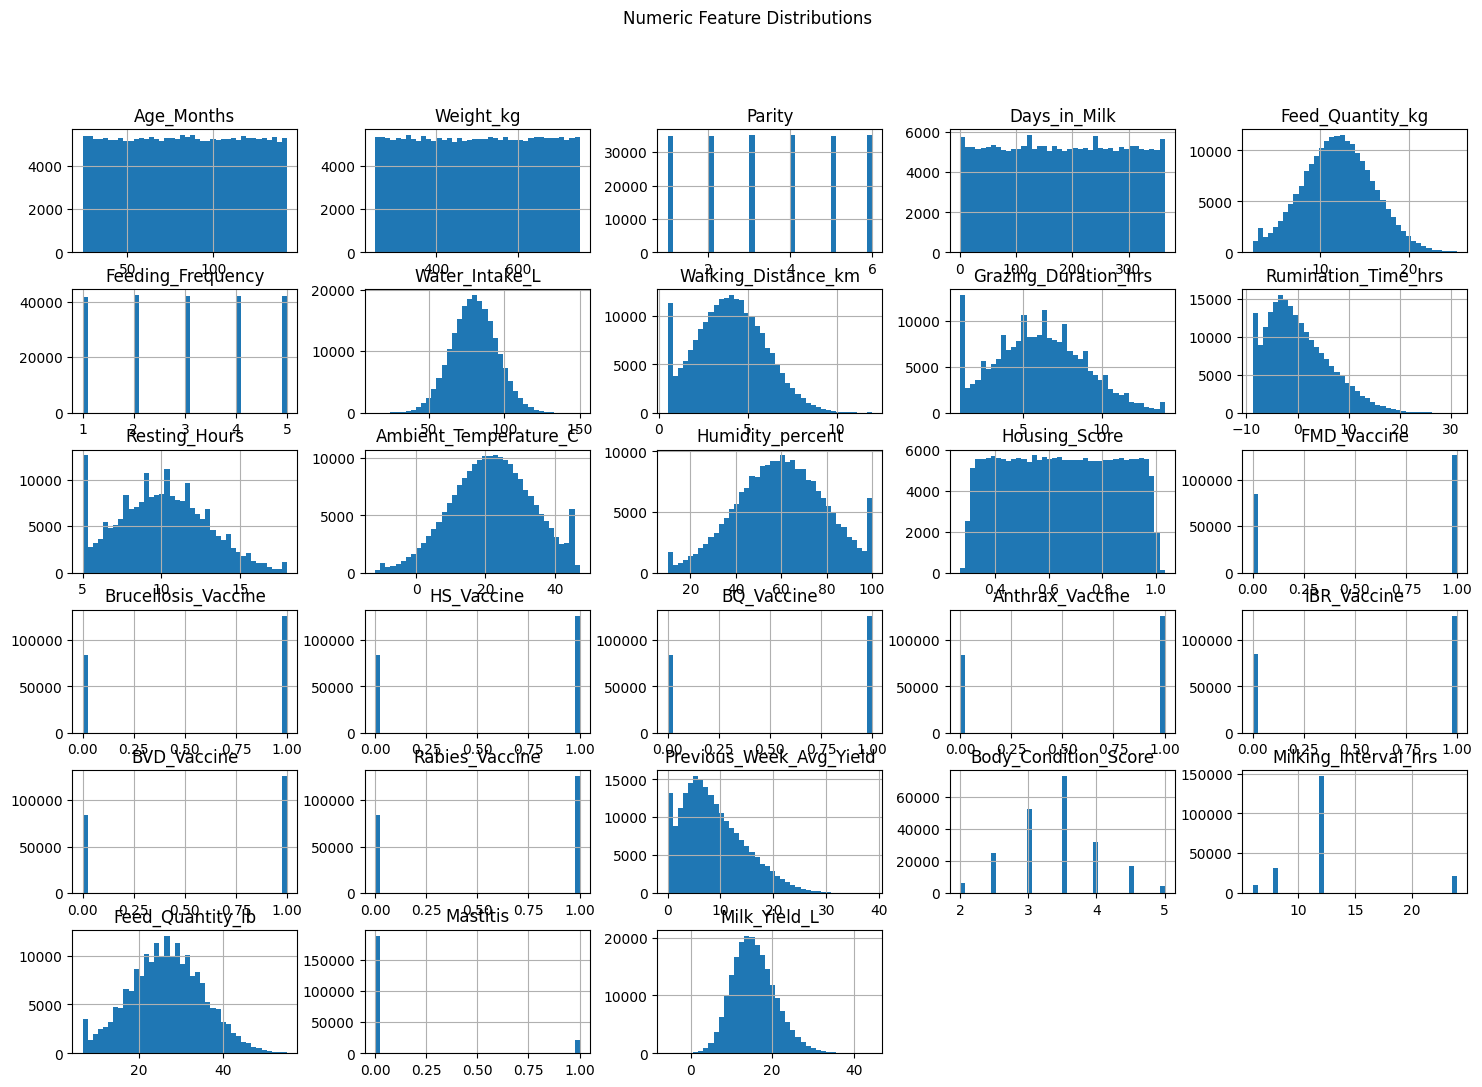

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns

df[numeric_cols].hist(figsize=(18, 12), bins=40)
plt.suptitle("Numeric Feature Distributions")
plt.show()

## 3.2 Milk Yield Relationship Analysis

We explore how key features relate to the target Milk_Yield_L.
This includes:

- feed quantity

- housing score

- basic correlations

These plots help us understand nonlinear patterns and outliers.

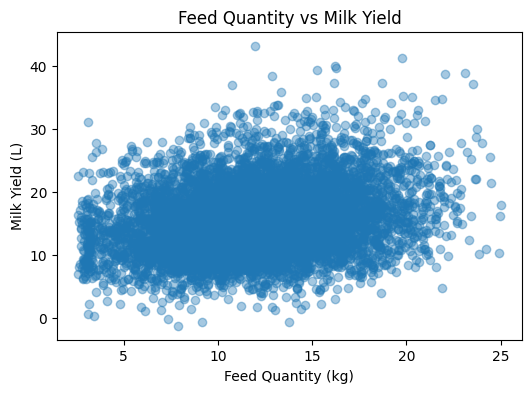

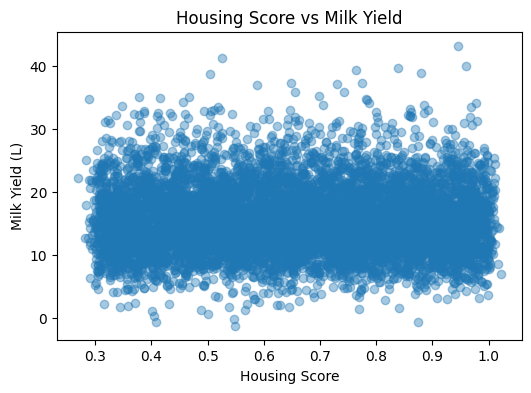

In [10]:
sample = df.sample(8000, random_state=42)  # faster plotting

plt.figure(figsize=(6,4))
plt.scatter(sample["Feed_Quantity_kg"], sample["Milk_Yield_L"], alpha=0.4)
plt.xlabel("Feed Quantity (kg)")
plt.ylabel("Milk Yield (L)")
plt.title("Feed Quantity vs Milk Yield")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(sample["Housing_Score"], sample["Milk_Yield_L"], alpha=0.4)
plt.xlabel("Housing Score")
plt.ylabel("Milk Yield (L)")
plt.title("Housing Score vs Milk Yield")
plt.show()

Interpretation Notes (COMING BACK TO THIS)

(Here YOU summarize what the plots show.)
For example:

Milk yield appears moderately positively correlated with feed quantity.

Housing score may show a plateau effect.

Some extreme outliers may need to be clipped or removed.

#PART 4: Correlation Analysis

## 4.1 Correlation Matrix

We compute correlations between all numeric features to identify the strongest predictors of milk yield and potential multicollinearity.

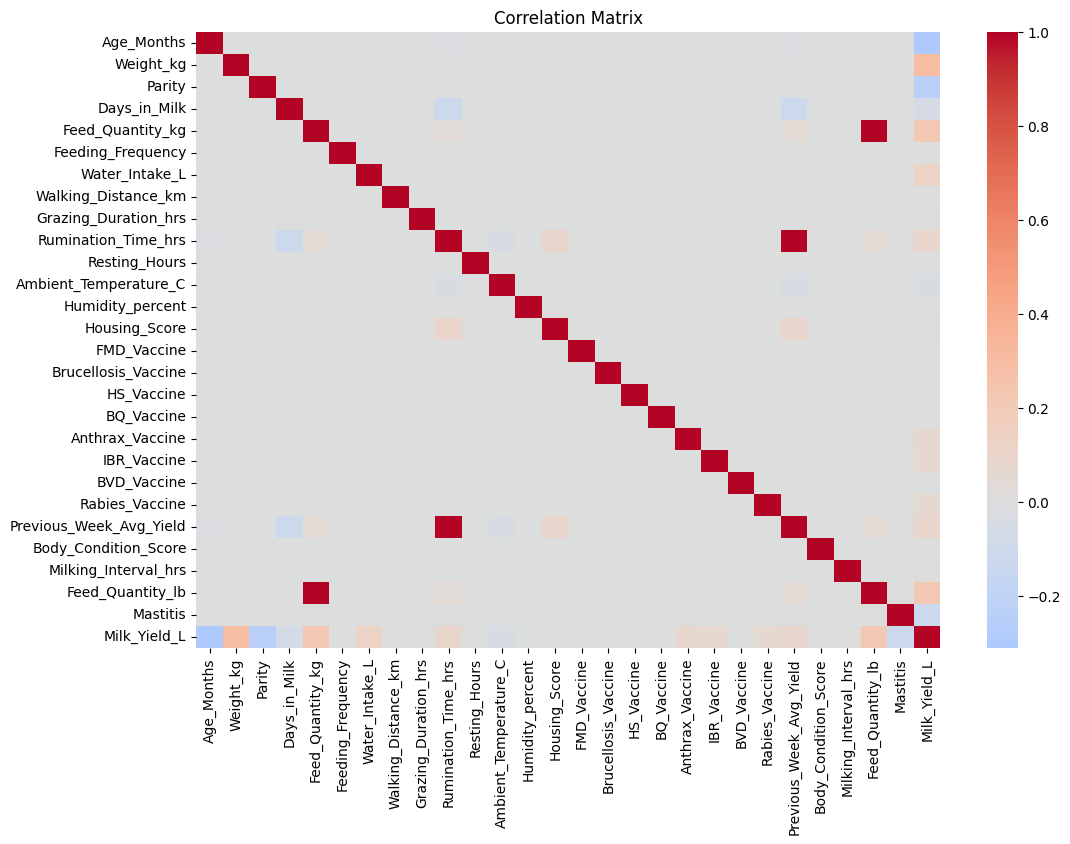

,Milk_Yield_L
Milk_Yield_L,1.000000
Weight_kg,0.300464
Feed_Quantity_lb,0.223631
Feed_Quantity_kg,0.223288
Water_Intake_L,0.124911
Rumination_Time_hrs,0.089823
Previous_Week_Avg_Yield,0.089823
IBR_Vaccine,0.072263
Anthrax_Vaccine,0.069642
Rabies_Vaccine,0.068618


In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

df.corr(numeric_only=True)["Milk_Yield_L"].sort_values(ascending=False)

## 4.2 Farm-Level Correlations

Since farms might differ in feeding strategy or environment, we compute correlations within each farm.

In [12]:
farm_corrs = (
    df.groupby("Farm_ID")[["Milk_Yield_L", "Feed_Quantity_kg"]]
      .corr()
      .iloc[0::2, 1]
      .sort_values(ascending=False)
)

farm_corrs.head(10)

,,Feed_Quantity_kg
Farm_ID,,
FARM_0921,Milk_Yield_L,0.437758
FARM_0897,Milk_Yield_L,0.427276
FARM_0827,Milk_Yield_L,0.420672
FARM_0155,Milk_Yield_L,0.410740
FARM_0616,Milk_Yield_L,0.397610
FARM_0655,Milk_Yield_L,0.387967
FARM_0955,Milk_Yield_L,0.387349
FARM_0027,Milk_Yield_L,0.386456
FARM_0912,Milk_Yield_L,0.381983


Notes on Farm-Level Variation (COMING BACK TO THIS)

(Write your conclusions, e.g.:)

Some farms show very strong correlation between feed and yield.

Others show weak or even negative correlation, possibly reflecting differences in feed type, breed, or weather patterns.

This suggests Farm_ID might be a valuable categorical feature.

# 5. Data Cleaning Plan

Based on what we discovered, our cleaning steps will include:

- Handling redundant features

- Drop Feed_Quantity_lb (kg column is sufficient)

- Handling date columns

- Drop if irrelevant OR extract useful components (season, month)

- Combining vaccination features

- Create a single Total_Vaccinations or binary Any_Vaccinated

- Categorical cleanup

- Convert Farm_ID to string/category

- Handling missing values

- Numeric: impute with median

- Categorical: impute with mode

- Domain-specific decisions where necessary

- Outlier handling

- Review milk yield and feed quantity for extreme values

In [13]:
# Make a working copy
clean_df = df.copy()

# 1. Drop redundant columns
if "Feed_Quantity_lb" in clean_df.columns:
    clean_df = clean_df.drop(columns=["Feed_Quantity_lb"])

# 2. Convert categorical columns
clean_df["Farm_ID"] = clean_df["Farm_ID"].astype(str)

# 3. Combine vaccination columns (example – adjust to actual column names)
vaccine_cols = [col for col in clean_df.columns if "Vaccine" in col]
if vaccine_cols:
    clean_df["Total_Vaccines"] = clean_df[vaccine_cols].sum(axis=1)

# 4. Drop date column if irrelevant
if "Date" in clean_df.columns:
    clean_df = clean_df.drop(columns=["Date"])

clean_df.head()

,Cattle_ID,Breed,Climate_Zone,Management_System,Age_Months,Weight_kg,Parity,Lactation_Stage,Days_in_Milk,Feed_Type,Feed_Quantity_kg,Feeding_Frequency,Water_Intake_L,Walking_Distance_km,Grazing_Duration_hrs,Rumination_Time_hrs,Resting_Hours,Ambient_Temperature_C,Humidity_percent,Housing_Score,FMD_Vaccine,Brucellosis_Vaccine,HS_Vaccine,BQ_Vaccine,Anthrax_Vaccine,IBR_Vaccine,BVD_Vaccine,Rabies_Vaccine,Previous_Week_Avg_Yield,Body_Condition_Score,Milking_Interval_hrs,Farm_ID,Mastitis,Milk_Yield_L,Total_Vaccines
0,CATTLE_133713,Holstein,Tropical,Intensive,114,544.8,4,Mid,62,Concentrates,16.363455,2,71.101024,4.77,7.8,-2.269369,12.3,28.706090,70.6,0.871430,0,1,1,0,0,1,0,1,6.31,3.0,12,FARM_0301,1,12.192634,4
1,CATTLE_027003,Holstein,Arid,Mixed,136,298.9,4,Mid,213,Crop_Residues,NaN,4,55.697328,5.99,7.4,8.973851,11.4,28.599741,57.5,0.825488,1,1,0,1,0,0,0,0,17.16,4.0,12,FARM_0219,0,14.717031,3
2,CATTLE_122459,Holstein,Tropical,Semi_Intensive,64,336.6,4,Late,16,Hay,7.198607,2,65.576827,3.45,8.8,-4.590550,8.6,12.520386,51.2,0.904957,0,0,1,1,0,1,1,0,4.07,3.5,12,FARM_0802,0,14.006142,4
3,CATTLE_213419,Jersey,Mediterranean,Intensive,58,370.5,1,Early,339,Crop_Residues,18.694344,2,71.238287,5.95,6.5,1.792698,10.1,40.510261,57.9,0.324955,1,0,1,0,1,0,0,0,10.23,3.0,24,FARM_0034,0,24.324325,3
4,CATTLE_106260,Guernsey,Subtropical,Intensive,84,641.5,6,Early,125,Mixed_Feed,14.779198,4,46.979548,5.39,6.4,12.621422,9.3,-7.711288,73.2,0.871019,0,1,1,1,1,0,1,1,20.68,3.0,12,FARM_0695,1,12.023074,6


# 6. Missing Value Imputation

We impute:

Numeric → median

Categorical → mode

In [14]:
from sklearn.impute import SimpleImputer

num_cols = clean_df.select_dtypes(include=np.number).columns
cat_cols = clean_df.select_dtypes(exclude=np.number).columns

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

clean_df[num_cols] = num_imputer.fit_transform(clean_df[num_cols])
clean_df[cat_cols] = cat_imputer.fit_transform(clean_df[cat_cols])

clean_df.isna().sum()

,0
Cattle_ID,0
Breed,0
Climate_Zone,0
Management_System,0
Age_Months,0
Weight_kg,0
Parity,0
Lactation_Stage,0
Days_in_Milk,0
Feed_Type,0


# 7. Summary of Cleaning + Exploration (COMING BACK TO THIS)

(Here YOU summarize your process. Example structure:)

We explored distributions, correlations, and relationships between milk yield and key predictors.

Based on EDA findings, we cleaned the data by removing redundant columns, imputing missing values, and converting Farm_ID into a categorical feature.

Exploratory plots revealed strong relationships between feed quantity and milk yield, motivating further feature engineering in the next section.

The cleaned dataset clean_df is now ready for modeling.

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("cattle_data_train.csv")

#Compute correlations with Feed_Quantity_kg
correlations = (
    df.corr(numeric_only=True)["Feed_Quantity_kg"]
      .sort_values(ascending=False)
)

print(correlations)

corrs = (
    df.groupby(["Farm_ID"])[["Milk_Yield_L", "Feed_Quantity_kg"]]
    .corr()
    .iloc[0::2, 1]
)

farm_correlations = corrs.sort_values(ascending=False)
print(farm_correlations)

Feed_Quantity_kg           1.000000
Feed_Quantity_lb           0.998757
Milk_Yield_L               0.223288
Rumination_Time_hrs        0.040673
Previous_Week_Avg_Yield    0.040673
Parity                     0.004293
Mastitis                   0.003009
Water_Intake_L             0.002390
Days_in_Milk               0.001656
Anthrax_Vaccine            0.001621
Feeding_Frequency          0.001352
Humidity_percent           0.001180
IBR_Vaccine                0.000923
Rabies_Vaccine             0.000916
BQ_Vaccine                 0.000783
Age_Months                 0.000363
Housing_Score              0.000339
Ambient_Temperature_C      0.000249
Walking_Distance_km        0.000100
Body_Condition_Score      -0.000161
Milking_Interval_hrs      -0.000398
Grazing_Duration_hrs      -0.000462
HS_Vaccine                -0.000649
FMD_Vaccine               -0.001442
Resting_Hours             -0.001615
BVD_Vaccine               -0.001813
Brucellosis_Vaccine       -0.001925
Weight_kg                 -0